### perceptron algorithm 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, random_state=1)  # generate 1000 points, there are 2 classes 

In [3]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# check class label
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 500, 1: 500})


In [6]:
X[:4]

array([[-3.05837272,  4.48825769],
       [-8.60973869, -3.72714879],
       [ 1.37129721,  5.23107449],
       [-9.33917563, -2.9544469 ]])

In [7]:
y[:4]

array([0, 1, 0, 1])

In [8]:
# show first few examples
for i in range(5):
    print(X[i], y[i])

[-3.05837272  4.48825769] 0
[-8.60973869 -3.72714879] 1
[1.37129721 5.23107449] 0
[-9.33917563 -2.9544469 ] 1
[-11.57178593  -3.85275513] 1


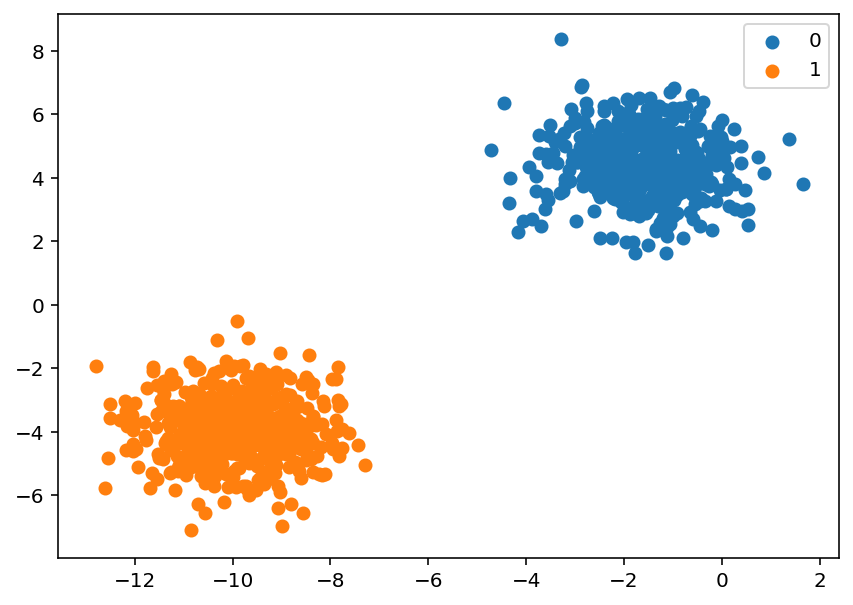

In [9]:
# plot the dataset and color the by class label
# example of binary classification task
from numpy import where
plt.figure(1, figsize=(7, 5))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import Perceptron
# define model
classifier = Perceptron()
# fit model
classifier.fit(X, y)

Perceptron()

In [11]:
# make predictions
expected = y  # true value 
predicted = classifier.predict(X) 

In [15]:
# check one test point 
row = [-4, 4] # try one point 
# make a prediction
yhat = classifier.predict([row])
print('Predicted Class: %d' % yhat)

Predicted Class: 0


In [12]:
# evaulate your model
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[500   0]
 [  0 500]]


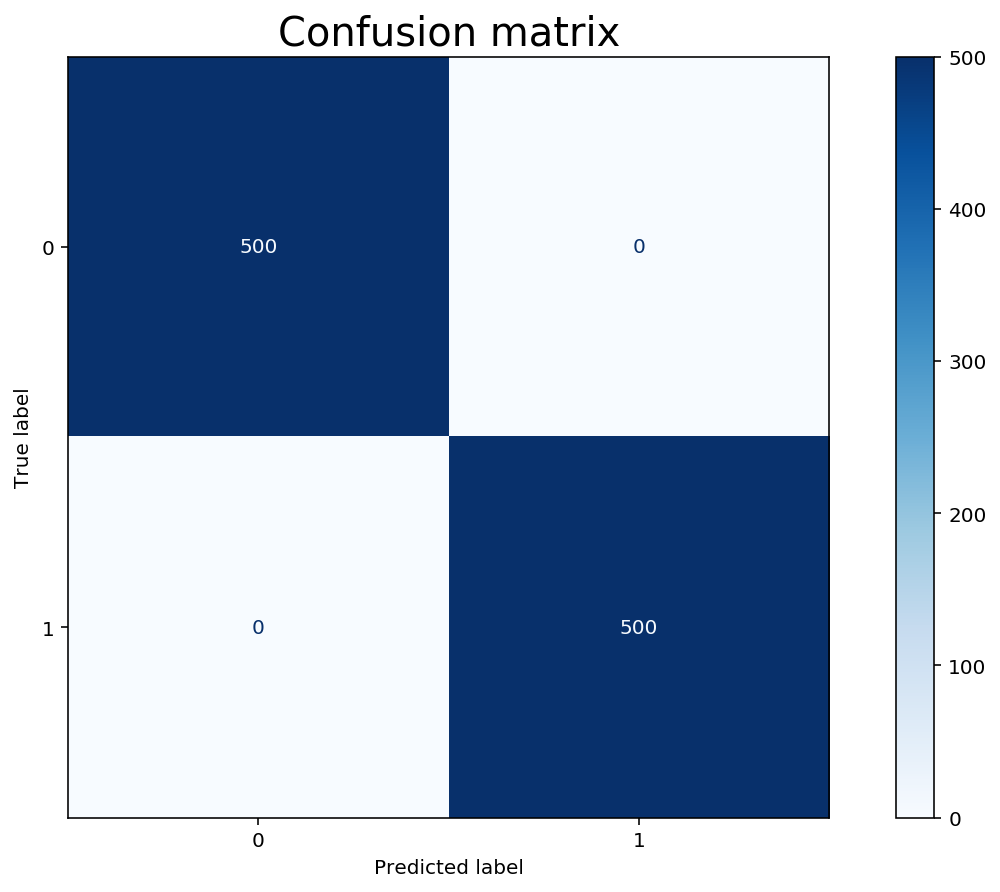

In [13]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title, FontSize = 20)
plt.show()

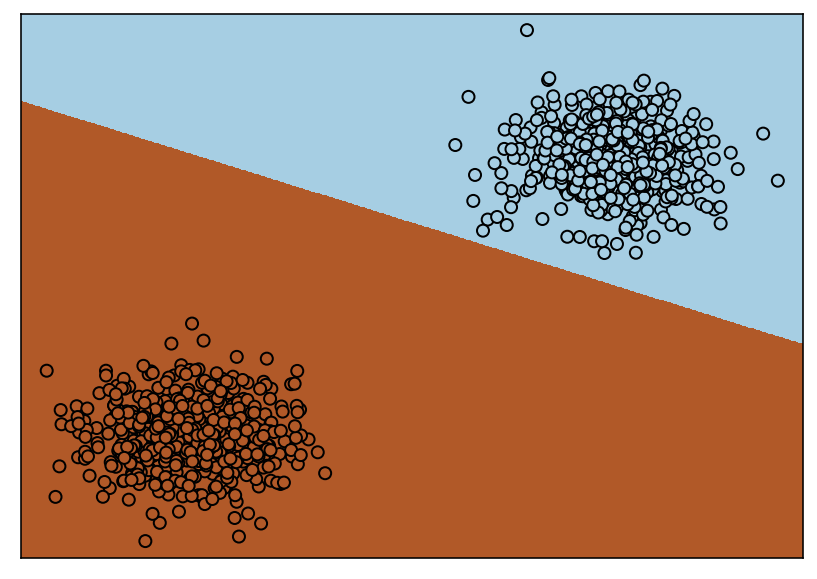

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression

In [16]:
# example of multi-class classification task
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt 

In [17]:
# define dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)  # 1000points, 3 classes 

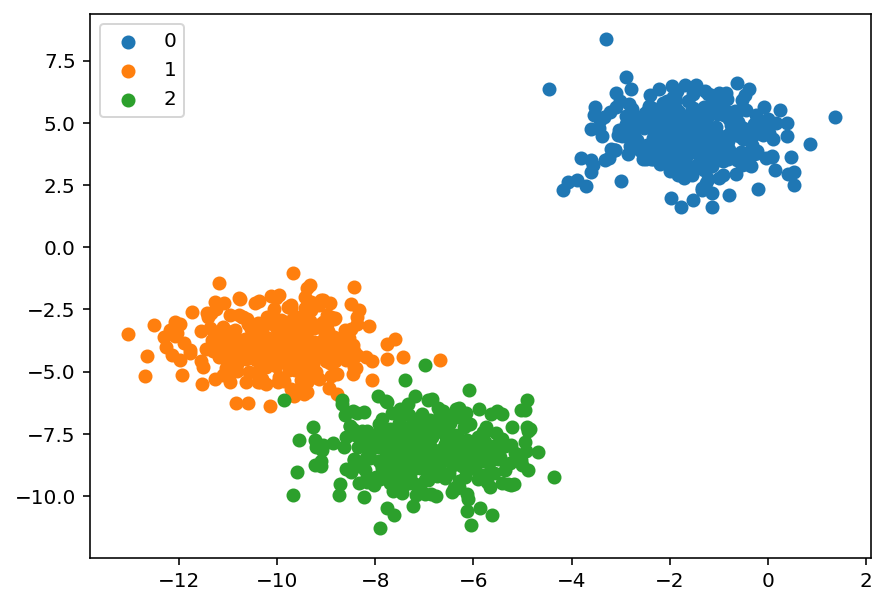

In [18]:
# class label
counter = Counter(y)
# plot the dataset and color the by class label
plt.figure(1, figsize=(7, 5))
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# # fit a logistic regression model to the data
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

In [20]:
# make predictions
expected = y
predicted = classifier.predict(X)

In [21]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       0.99      1.00      1.00       333
           2       1.00      0.99      1.00       333

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[334   0   0]
 [  0 333   0]
 [  0   2 331]]


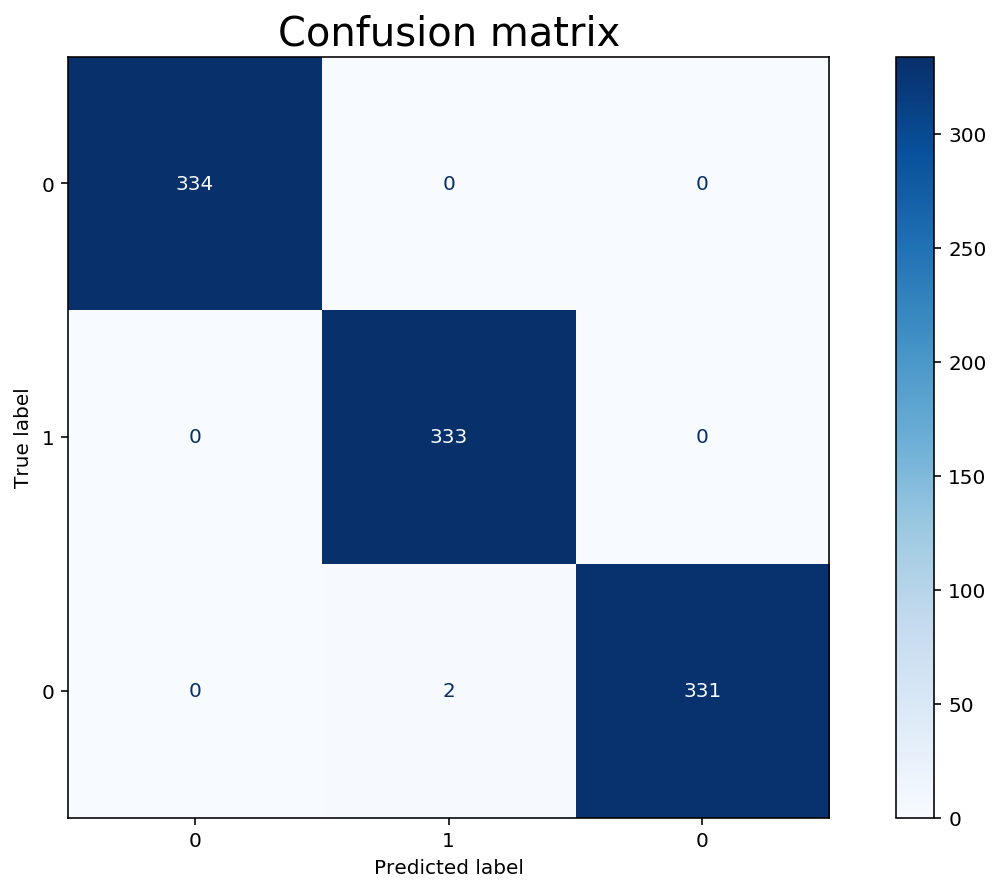

In [22]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title, FontSize = 20)
plt.show()

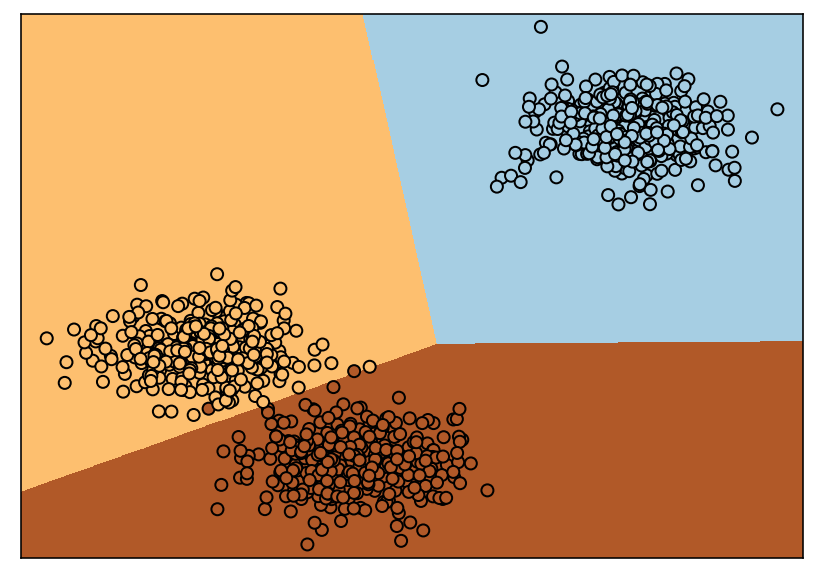

In [23]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Naive Bayes

In [24]:
# example of multi-class classification task
from collections import Counter
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

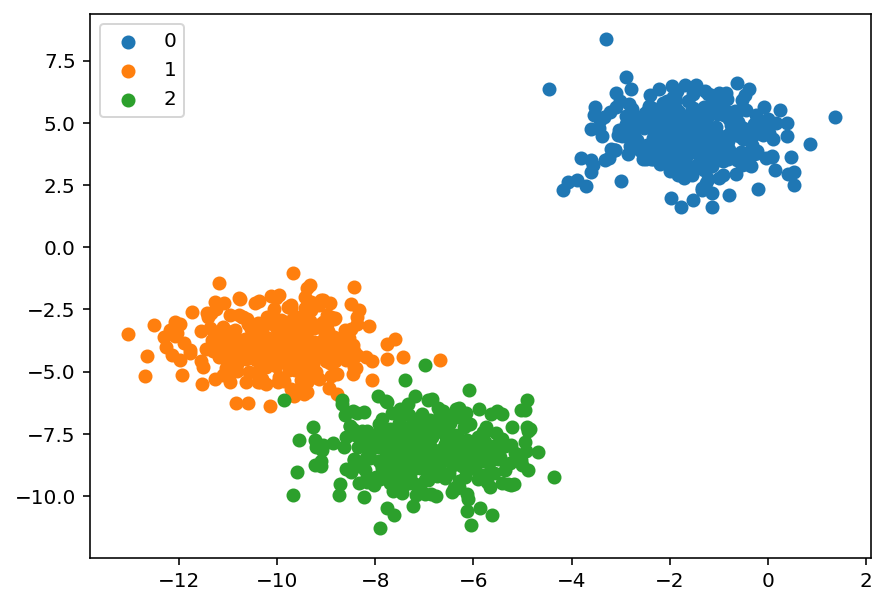

In [25]:
# class label
counter = Counter(y)
# plot the dataset and color the by class label
plt.figure(1, figsize=(7, 5))
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [26]:
# Gaussian Naive Bayes
# from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# fit a Naive Bayes model to the data
classifier = GaussianNB()
classifier.fit(X, y)

GaussianNB()

In [27]:
# make predictions
expected = y
predicted = classifier.predict(X)

In [28]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       0.99      1.00      1.00       333
           2       1.00      0.99      1.00       333

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[334   0   0]
 [  0 333   0]
 [  0   2 331]]


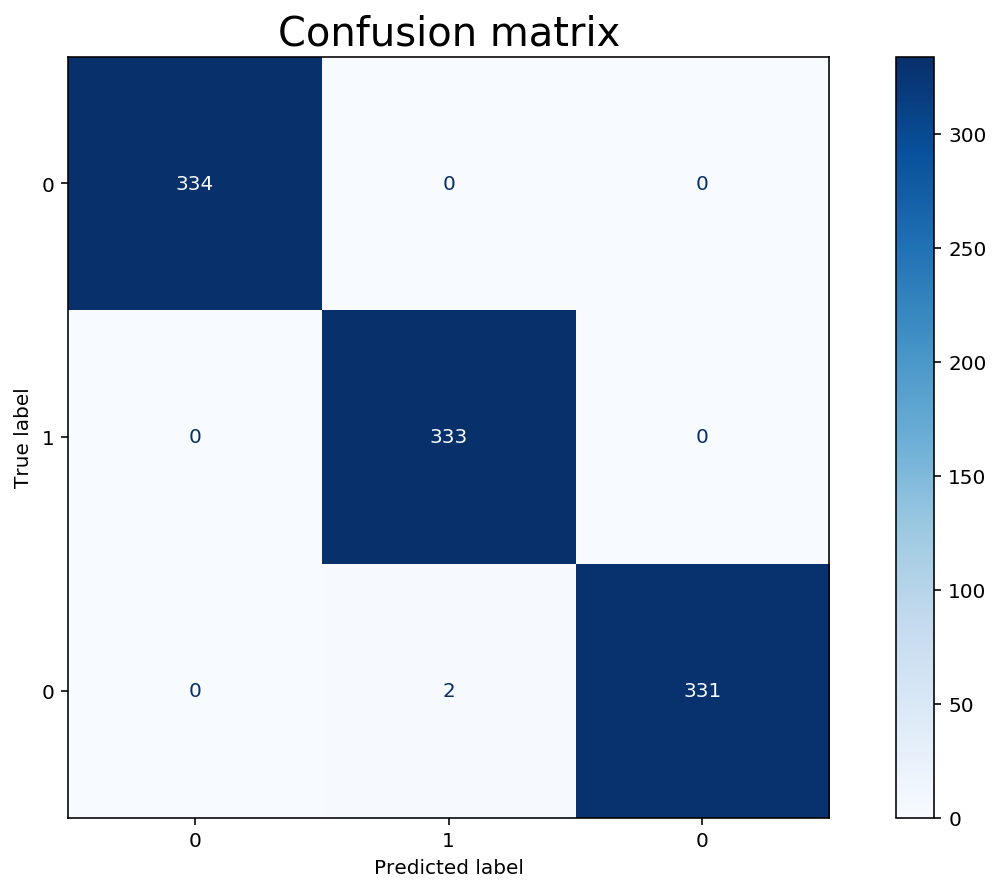

In [29]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title, FontSize = 20)
plt.show()

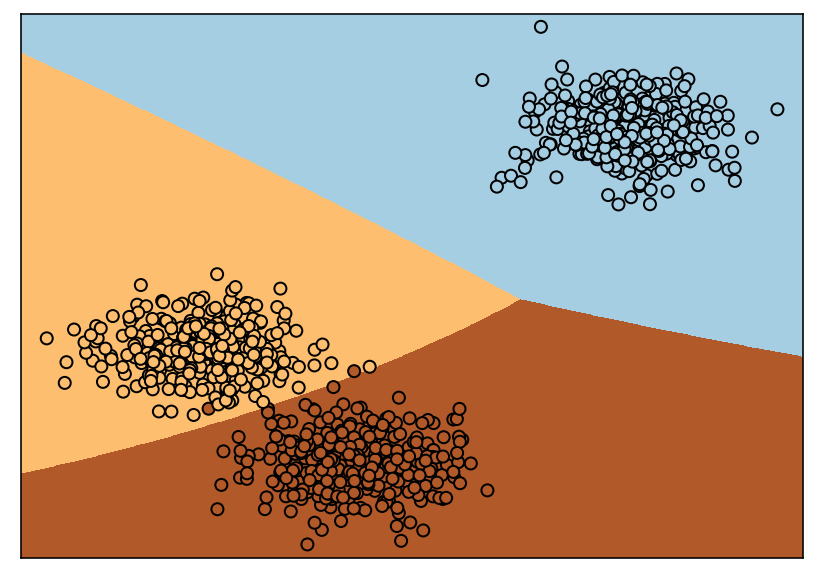

In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### k-Nearest Neighbor

In [31]:
# example of multi-class classification task
from collections import Counter
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

In [32]:
# example of multi-class classification task
from collections import Counter
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

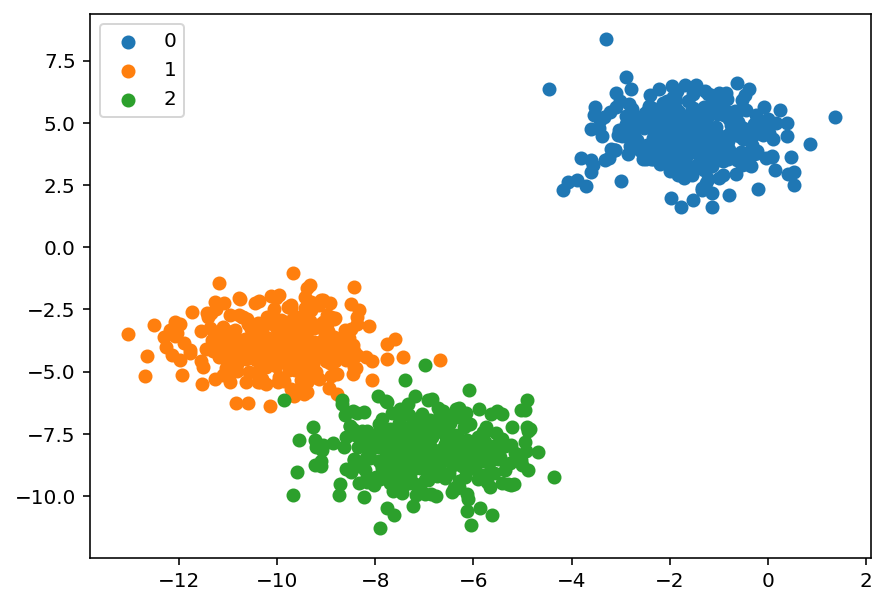

In [33]:
# class label
counter = Counter(y)
# plot the dataset and color the by class label
plt.figure(1, figsize=(7, 5))
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [35]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X, y)
# print(model)

KNeighborsClassifier()

In [36]:
# make predictions
expected = y
predicted = model.predict(X)

In [37]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       0.99      1.00      1.00       333
           2       1.00      0.99      1.00       333

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[334   0   0]
 [  0 333   0]
 [  0   2 331]]


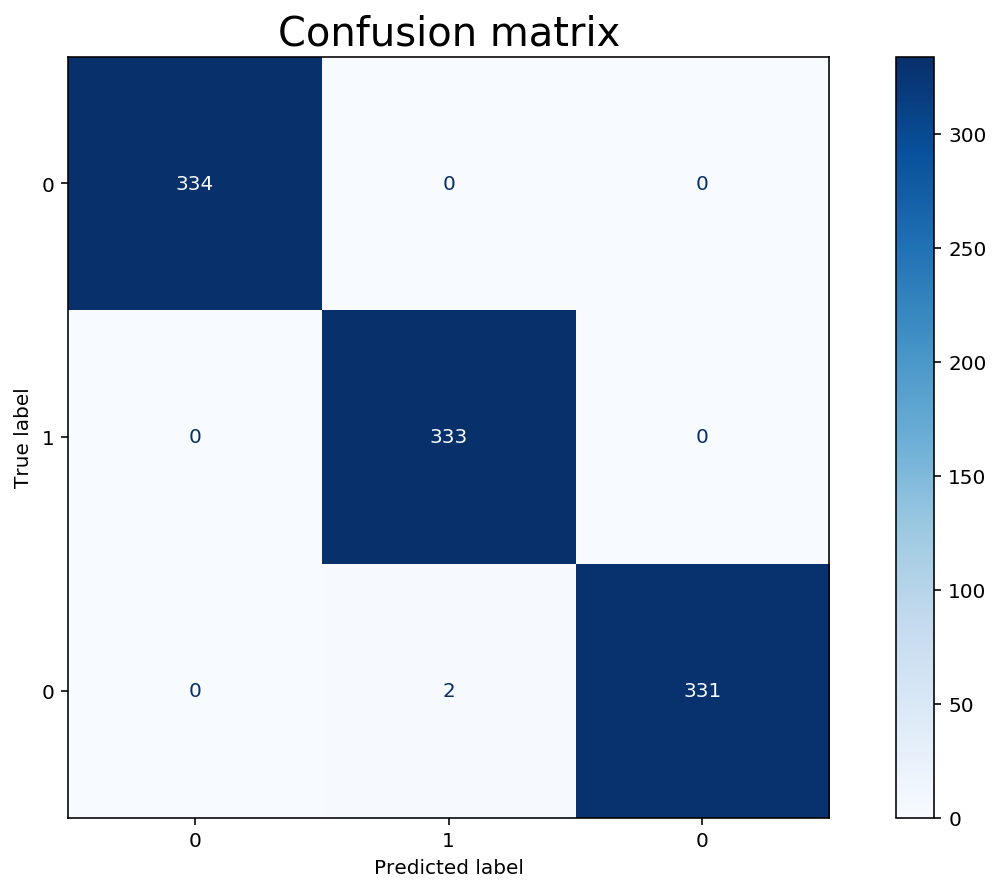

In [38]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title, FontSize = 20)
plt.show()

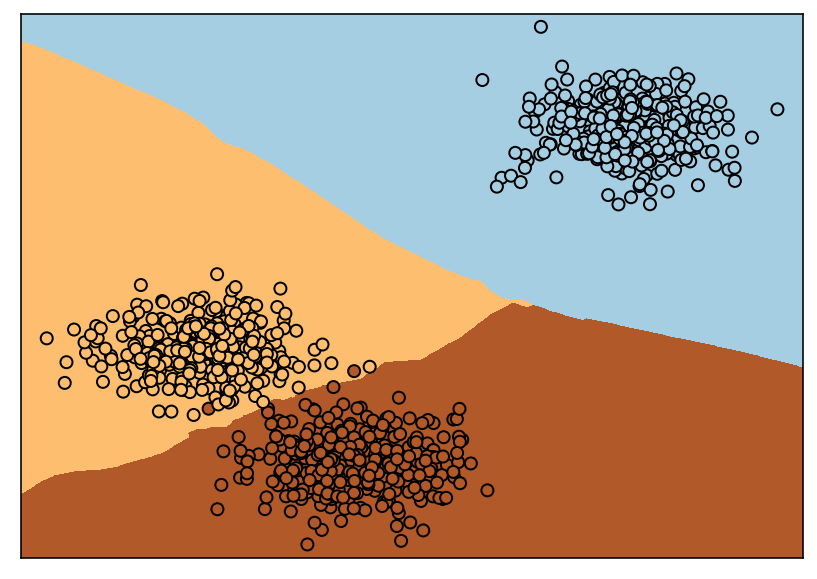

In [40]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Support Vector Machine

In [41]:
# example of multi-class classification task
from collections import Counter
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

In [42]:
# example of multi-class classification task
from collections import Counter
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

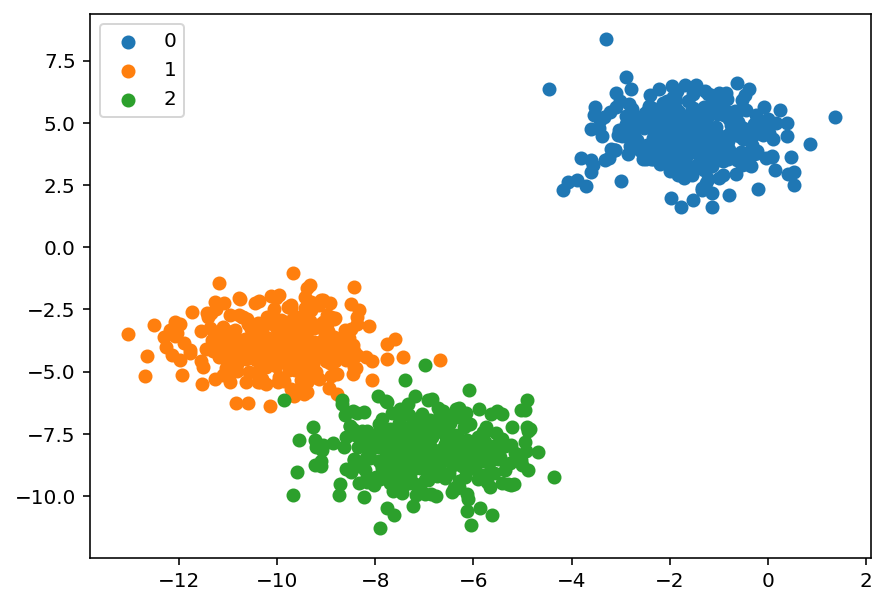

In [43]:
# class label
counter = Counter(y)
# plot the dataset and color the by class label
plt.figure(1, figsize=(7, 5))
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [44]:

# from sklearn import datasets
# from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC()
model.fit(X, y)
# print(model)


SVC()

In [45]:
# make predictions
expected = y
predicted = model.predict(X)

In [46]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       0.99      1.00      1.00       333
           2       1.00      0.99      1.00       333

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[334   0   0]
 [  0 333   0]
 [  0   2 331]]


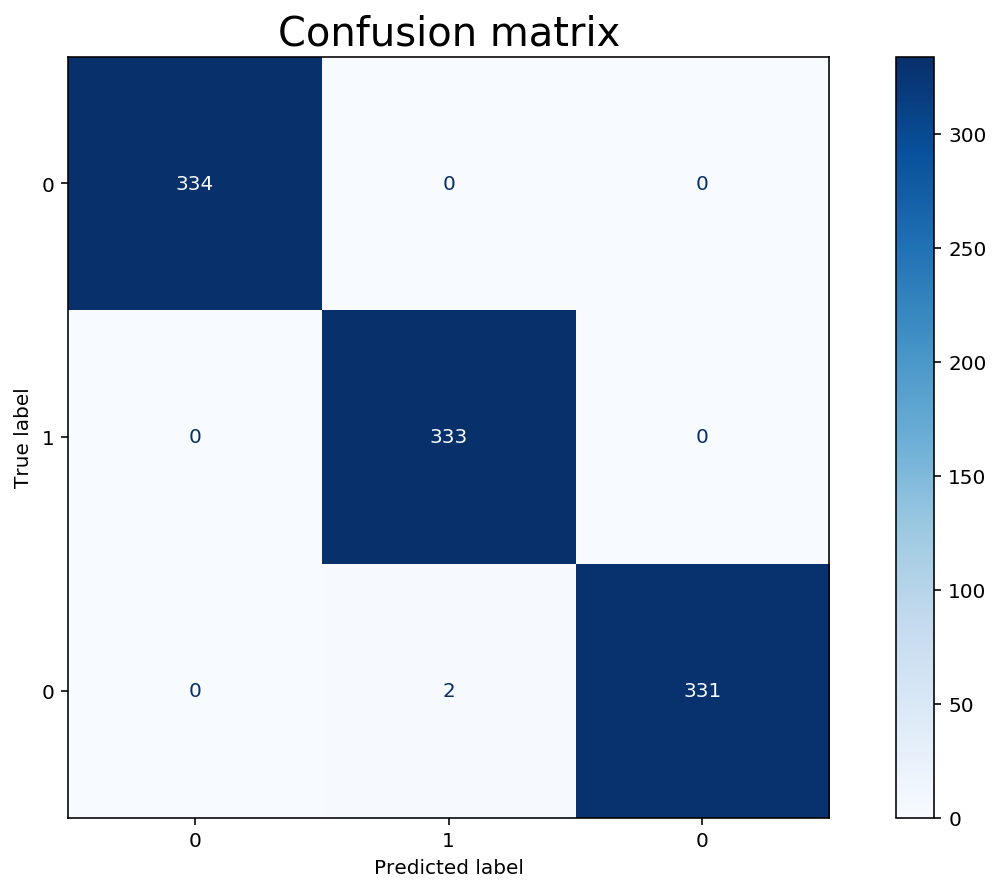

In [47]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title, FontSize = 20)
plt.show()

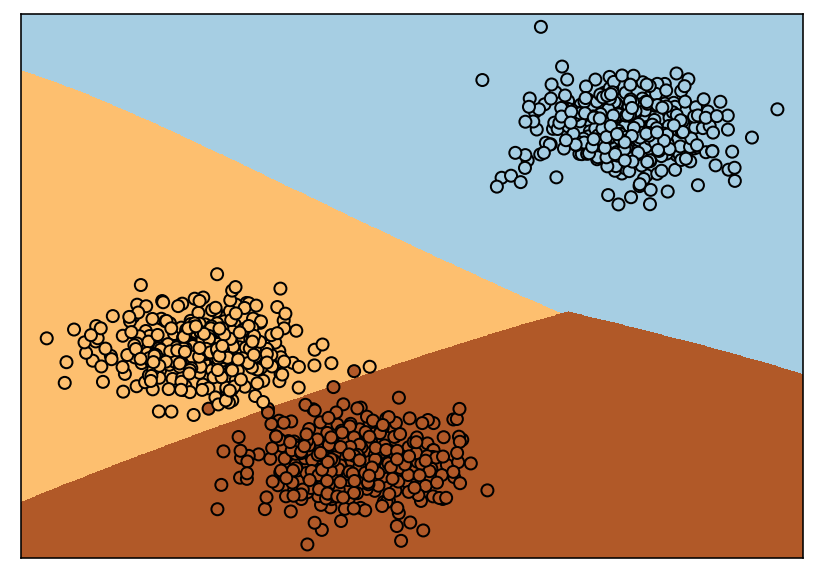

In [48]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Random forest/decision tree 



https://scikit-learn.org/stable/modules/tree.html#classification